In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [13]:
inflows = pd.read_csv("../data/inflows of foreign population by nationality.csv", low_memory=False)

In [14]:
inflows.head()

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value,Flag Codes,Flags
0,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2000,2000,887.0,NaN,NaN
1,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2001,2001,456.0,NaN,NaN
2,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2002,2002,660.0,NaN,NaN
3,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2003,2003,1015.0,NaN,NaN
4,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2004,2004,1340.0,NaN,NaN


In [15]:
inflows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464640 entries, 0 to 464639
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   CO2                           464640 non-null  object 
 1   Country of birth/nationality  464640 non-null  object 
 2   VAR                           464640 non-null  object 
 3   Variable                      464640 non-null  object 
 4   GEN                           464640 non-null  object 
 5   Gender                        464640 non-null  object 
 6   COU                           464640 non-null  object 
 7   Country                       464640 non-null  object 
 8   YEA                           464640 non-null  int64  
 9   Year                          464640 non-null  int64  
 10  Value                         464637 non-null  float64
 11  Flag Codes                    3 non-null       object 
 12  Flags                         3 non-null    

In [16]:
inflows['Variable'].unique

<bound method Series.unique of 0          Inflows of foreign population by nationality
1          Inflows of foreign population by nationality
2          Inflows of foreign population by nationality
3          Inflows of foreign population by nationality
4          Inflows of foreign population by nationality
                              ...                      
464635    Outflows of foreign population by nationality
464636    Outflows of foreign population by nationality
464637    Outflows of foreign population by nationality
464638    Outflows of foreign population by nationality
464639    Outflows of foreign population by nationality
Name: Variable, Length: 464640, dtype: object>

In [18]:
outflows = inflows[inflows['Variable'] == 'Outflows of foreign population by nationality']

In [19]:
outflows.tail()

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value,Flag Codes,Flags
464635,OMN,Oman,B12,Outflows of foreign population by nationality,TOT,Total,TUR,Türkiye,2021,2021,27.0,NaN,NaN
464636,KNA,Saint Kitts and Nevis,B12,Outflows of foreign population by nationality,TOT,Total,TUR,Türkiye,2021,2021,27.0,NaN,NaN
464637,SLE,Sierra Leone,B12,Outflows of foreign population by nationality,TOT,Total,TUR,Türkiye,2021,2021,20.0,NaN,NaN
464638,LKA,Sri Lanka,B12,Outflows of foreign population by nationality,TOT,Total,TUR,Türkiye,2021,2021,30.0,NaN,NaN
464639,ZMB,Zambia,B12,Outflows of foreign population by nationality,TOT,Total,TUR,Türkiye,2021,2021,40.0,NaN,NaN


In [20]:
inflows = inflows[inflows['Variable'] == 'Inflows of foreign population by nationality']

Total Inflows of migrants in a given country

In [97]:
fig = px.choropleth(
    data_frame=inflows.groupby(['COU', 'Year', "Country"], as_index=False)['Value'].sum(),
    locations="COU",
    animation_frame="Year",
    animation_group = "COU",
    color="Value",
    title="Migration Inflows Across Countries",
    color_continuous_scale="Viridis",
    projection="equirectangular", 
    labels={"Value": "Migration Value"},
    hover_name="Country",
    template="ggplot2",
)

fig.show()

ok, what is happening in Turkiye? there are migrants in 2010. then none for five years. then again in 2016?


Let's see where are these migrants flowing from to country.

In [67]:
outflows_from_a_country_total = inflows[inflows['Country of birth/nationality'] != "Total"]

In [68]:
outflows_from_a_country_total.sort_values(by = "Value", ascending=False).head(5)

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value,Flag Codes,Flags
168236,SYR,Syria,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2015,2015,309699.0,NaN,NaN
143981,ROU,Romania,B11,Inflows of foreign population by nationality,TOT,Total,ITA,Italy,2007,2007,271443.0,NaN,NaN
143860,ROU,Romania,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2018,2018,251971.0,NaN,NaN
143861,ROU,Romania,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2019,2019,245047.0,NaN,NaN
143859,ROU,Romania,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2017,2017,230603.0,NaN,NaN


In [98]:
fig = px.choropleth(
    data_frame=outflows_from_a_country_total.groupby(['Country of birth/nationality', 'CO2', 'Year'], as_index=False)['Value'].sum(),
    locations="CO2",
    animation_frame="Year",
    animation_group="CO2",
    color="Value",
    title="Total Emigration Population Across Countries and Years",
    color_continuous_scale="Viridis",
    projection="natural earth",
    labels={"Value": "Total Migration Value"},
    hover_name="Country of birth/nationality",
    template="plotly",
)

fig.show()

# Top 10 emigrating countries

In [79]:
top_10_emigration = outflows_from_a_country_total.groupby(['CO2', 'Year'], as_index= False)['Value'].sum()
top_10_filter = top_10_emigration.groupby('CO2')['Value'].sum().sort_values(ascending = False).head(10).index
top_10_emigration = outflows_from_a_country_total[outflows_from_a_country_total['CO2'].isin(top_10_filter)]

In [80]:
top_10_emigration

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value,Flag Codes,Flags
39525,CHN,China,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2000,2000,8055.0,NaN,NaN
39526,CHN,China,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2001,2001,8295.0,NaN,NaN
39527,CHN,China,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2002,2002,9102.0,NaN,NaN
39528,CHN,China,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2003,2003,9374.0,NaN,NaN
39529,CHN,China,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2004,2004,12523.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
462220,PHL,Philippines,B11,Inflows of foreign population by nationality,TOT,Total,LVA,Latvia,2017,2017,2.0,NaN,NaN
462221,PHL,Philippines,B11,Inflows of foreign population by nationality,TOT,Total,LVA,Latvia,2018,2018,89.0,NaN,NaN
462222,PHL,Philippines,B11,Inflows of foreign population by nationality,TOT,Total,LVA,Latvia,2019,2019,12.0,NaN,NaN
462223,PHL,Philippines,B11,Inflows of foreign population by nationality,TOT,Total,LVA,Latvia,2020,2020,3.0,NaN,NaN


In [94]:
# making choropleth animation for top 10 countries
fig = px.choropleth(
    data_frame=top_10_emigration.groupby(['Country of birth/nationality', 'CO2', 'Year'], as_index=False)['Value'].sum(),
    locations="CO2",
    animation_frame="Year",
    animation_group="CO2",
    color="Value",
    title="Total Emigration Population Across Top 10 Countries and Years",
    color_continuous_scale="Viridis",
    projection="equirectangular",
    labels={"Value": "Total Migration Value"},
    hover_name="Country of birth/nationality",
    template="plotly_dark",
)

fig.show()

Hypothesis testing? statistical analysis.

In [100]:
len(inflows['COU'].unique())

35

In [22]:
inflows.shape

(112539, 13)

In [23]:
inflows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112539 entries, 0 to 462381
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   CO2                           112539 non-null  object 
 1   Country of birth/nationality  112539 non-null  object 
 2   VAR                           112539 non-null  object 
 3   Variable                      112539 non-null  object 
 4   GEN                           112539 non-null  object 
 5   Gender                        112539 non-null  object 
 6   COU                           112539 non-null  object 
 7   Country                       112539 non-null  object 
 8   YEA                           112539 non-null  int64  
 9   Year                          112539 non-null  int64  
 10  Value                         112536 non-null  float64
 11  Flag Codes                    3 non-null       object 
 12  Flags                         3 non-null    

In [24]:
inflows['Year'].unique

<bound method Series.unique of 0         2000
1         2001
2         2002
3         2003
4         2004
          ... 
462377    2017
462378    2018
462379    2019
462380    2020
462381    2021
Name: Year, Length: 112539, dtype: int64>

2000-2010

In [46]:
# first decade
inflows_10 = inflows[inflows['Year'] <= 2010]
inflows_10['Year'].unique


<bound method Series.unique of 0         2000
1         2001
2         2002
3         2003
4         2004
          ... 
462371    2006
462372    2007
462373    2008
462374    2009
462375    2010
Name: Year, Length: 50935, dtype: int64>

In [9]:
inflows_10

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value,Flag Codes,Flags
0,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2000,2000,887.0,NaN,NaN
1,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2001,2001,456.0,NaN,NaN
2,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2002,2002,660.0,NaN,NaN
3,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2003,2003,1015.0,NaN,NaN
4,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2004,2004,1340.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
462371,FIN,Finland,B11,Inflows of foreign population by nationality,TOT,Total,LVA,Latvia,2006,2006,40.0,NaN,NaN
462372,FIN,Finland,B11,Inflows of foreign population by nationality,TOT,Total,LVA,Latvia,2007,2007,32.0,NaN,NaN
462373,FIN,Finland,B11,Inflows of foreign population by nationality,TOT,Total,LVA,Latvia,2008,2008,53.0,NaN,NaN
462374,FIN,Finland,B11,Inflows of foreign population by nationality,TOT,Total,LVA,Latvia,2009,2009,34.0,NaN,NaN


In [49]:
inflows_10 = inflows_10[inflows_10['CO2'] != 'TOT'].sort_values('Value', ascending=False).drop_duplicates('CO2')


In [50]:
inflows_10


,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value,Flag Codes,Flags,mean_immigration
143981,ROU,Romania,B11,Inflows of foreign population by nationality,TOT,Total,ITA,Italy,2007,2007,271443.0,NaN,NaN,10131.375191
116072,MEX,Mexico,B11,Inflows of foreign population by nationality,TOT,Total,USA,United States,2002,2002,218822.0,NaN,NaN,6401.401349
40049,CHN,China,B11,Inflows of foreign population by nationality,TOT,Total,KOR,Korea,2007,2007,177034.0,NaN,NaN,15767.954829
140367,POL,Poland,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2006,2006,151743.0,NaN,NaN,7874.387500
139514,PHL,Philippines,B11,Inflows of foreign population by nationality,TOT,Total,JPN,Japan,2004,2004,96200.0,NaN,NaN,5991.949429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142247,PRI,Puerto Rico,B11,Inflows of foreign population by nationality,TOT,Total,CAN,Canada,2010,2010,10.0,NaN,NaN,0.236593
43972,COK,Cook Islands,B11,Inflows of foreign population by nationality,TOT,Total,ESP,Spain,2005,2005,7.0,NaN,NaN,0.244318
130766,NIU,Niue,B11,Inflows of foreign population by nationality,TOT,Total,NZL,New Zealand,2005,2005,5.0,NaN,NaN,0.110778
174033,TKL,Tokelau,B11,Inflows of foreign population by nationality,TOT,Total,NZL,New Zealand,2002,2002,4.0,NaN,NaN,0.029412


In [54]:
top_10 = inflows_10.nlargest(10, 'Value')
top_10

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value,Flag Codes,Flags,mean_immigration
143981,ROU,Romania,B11,Inflows of foreign population by nationality,TOT,Total,ITA,Italy,2007,2007,271443.0,NaN,NaN,10131.375191
116072,MEX,Mexico,B11,Inflows of foreign population by nationality,TOT,Total,USA,United States,2002,2002,218822.0,NaN,NaN,6401.401349
40049,CHN,China,B11,Inflows of foreign population by nationality,TOT,Total,KOR,Korea,2007,2007,177034.0,NaN,NaN,15767.954829
140367,POL,Poland,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2006,2006,151743.0,NaN,NaN,7874.387500
139514,PHL,Philippines,B11,Inflows of foreign population by nationality,TOT,Total,JPN,Japan,2004,2004,96200.0,NaN,NaN,5991.949429
56894,ECU,Ecuador,B11,Inflows of foreign population by nationality,TOT,Total,ESP,Spain,2000,2000,91141.0,NaN,NaN,1742.959292
120929,MAR,Morocco,B11,Inflows of foreign population by nationality,TOT,Total,ESP,Spain,2007,2007,84978.0,NaN,NaN,4191.681745
82841,IND,India,B11,Inflows of foreign population by nationality,TOT,Total,USA,United States,2005,2005,84680.0,NaN,NaN,8382.265060
24092,BOL,Bolivia,B11,Inflows of foreign population by nationality,TOT,Total,ESP,Spain,2006,2006,77755.0,NaN,NaN,1100.484740
41362,COL,Colombia,B11,Inflows of foreign population by nationality,TOT,Total,ESP,Spain,2001,2001,71220.0,NaN,NaN,2783.063333


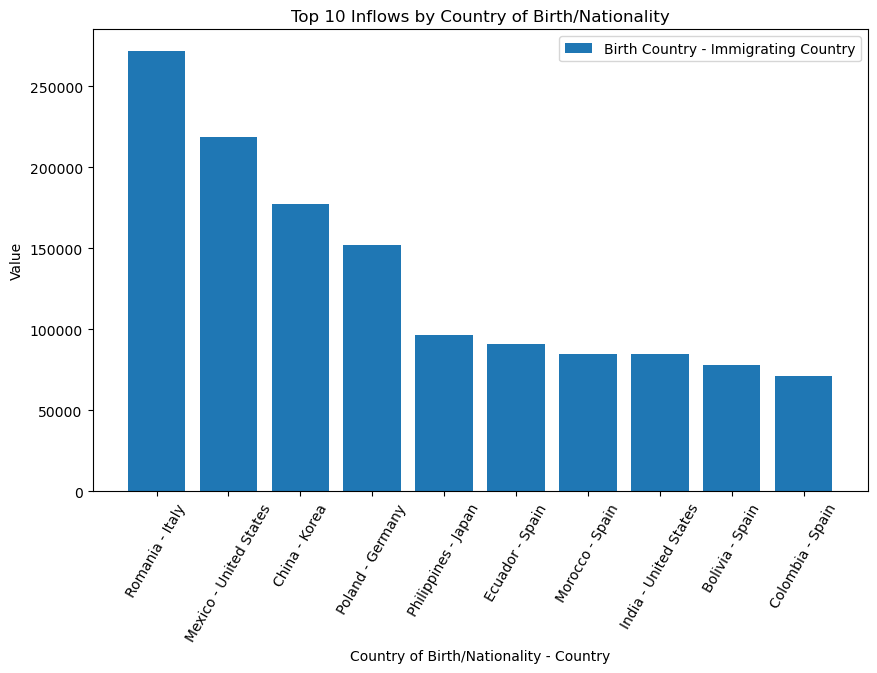

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(top_10['Country of birth/nationality'] + ' - ' + top_10['Country'], top_10['Value'])
plt.xlabel('Country of Birth/Nationality - Country')
plt.ylabel('Value')
plt.title('Top 10 Inflows by Country of Birth/Nationality')
plt.legend(['Birth Country - Immigrating Country'])  # Adding legend
plt.xticks(rotation=60)
plt.show()


In [43]:
inflows_10.head()

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value,Flag Codes,Flags,mean_immigration
0,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2000,2000,887.0,NaN,NaN,712.456693
1,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2001,2001,456.0,NaN,NaN,712.456693
2,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2002,2002,660.0,NaN,NaN,712.456693
3,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2003,2003,1015.0,NaN,NaN,712.456693
4,AFG,Afghanistan,B11,Inflows of foreign population by nationality,TOT,Total,AUS,Australia,2004,2004,1340.0,NaN,NaN,712.456693


In [44]:
top_10_countries = inflows_10[inflows['CO2'] != 'TOT'].nlargest(10, 'mean_immigration')
subsetted_inflows = inflows_10[inflows['CO2'].isin(top_10_countries['CO2'])]


/var/folders/pq/qfw7ttdx6js3zt8l7f7hpvtm0000gn/T/ipykernel_5247/2311087115.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_10_countries = inflows_10[inflows['CO2'] != 'TOT'].nlargest(10, 'mean_immigration')
/var/folders/pq/qfw7ttdx6js3zt8l7f7hpvtm0000gn/T/ipykernel_5247/2311087115.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subsetted_inflows = inflows_10[inflows['CO2'].isin(top_10_countries['CO2'])]


In [45]:
top_10_countries['CO2'].unique

<bound method Series.unique of 39525    CHN
39526    CHN
39527    CHN
39528    CHN
39529    CHN
39530    CHN
39531    CHN
39532    CHN
39533    CHN
39534    CHN
Name: CO2, dtype: object>

In [38]:
subsetted_inflows.tail()

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value,Flag Codes,Flags,mean_immigration
461557,CHN,China,B11,Inflows of foreign population by nationality,TOT,Total,LVA,Latvia,2017,2017,51.0,NaN,NaN,15767.954829
461558,CHN,China,B11,Inflows of foreign population by nationality,TOT,Total,LVA,Latvia,2018,2018,72.0,NaN,NaN,15767.954829
461559,CHN,China,B11,Inflows of foreign population by nationality,TOT,Total,LVA,Latvia,2019,2019,69.0,NaN,NaN,15767.954829
461560,CHN,China,B11,Inflows of foreign population by nationality,TOT,Total,LVA,Latvia,2020,2020,47.0,NaN,NaN,15767.954829
461561,CHN,China,B11,Inflows of foreign population by nationality,TOT,Total,LVA,Latvia,2021,2021,58.0,NaN,NaN,15767.954829


In [18]:
top_10_inflows = inflows[inflows['CO2'] != 'TOT'].nlargest(15, 'Value')

In [19]:
top_10_inflows

,CO2,Country of birth/nationality,VAR,Variable,GEN,Gender,COU,Country,YEA,Year,Value,Flag Codes,Flags
168236,SYR,Syria,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2015,2015,309699.0,NaN,NaN
143981,ROU,Romania,B11,Inflows of foreign population by nationality,TOT,Total,ITA,Italy,2007,2007,271443.0,NaN,NaN
143860,ROU,Romania,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2018,2018,251971.0,NaN,NaN
143861,ROU,Romania,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2019,2019,245047.0,NaN,NaN
143859,ROU,Romania,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2017,2017,230603.0,NaN,NaN
143858,ROU,Romania,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2016,2016,222298.0,NaN,NaN
143857,ROU,Romania,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2015,2015,221405.0,NaN,NaN
116072,MEX,Mexico,B11,Inflows of foreign population by nationality,TOT,Total,USA,United States,2002,2002,218822.0,NaN,NaN
116071,MEX,Mexico,B11,Inflows of foreign population by nationality,TOT,Total,USA,United States,2001,2001,205560.0,NaN,NaN
143863,ROU,Romania,B11,Inflows of foreign population by nationality,TOT,Total,DEU,Germany,2021,2021,202686.0,NaN,NaN
